In [1]:
from OSA import OSA
import pyvisa as visa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rm = visa.ResourceManager()
rm.list_resources()

('ASRL4::INSTR', 'ASRL5::INSTR', 'GPIB0::1::INSTR')

In [3]:
device_address = "GPIB0::1::INSTR"
osa = OSA(address=device_address)

In [4]:
osa.initialize()

In [6]:
start_wavelength = 1400
stop_wavelength = 1600
osa.display_wavelength_range(start_wavelength, stop_wavelength)

In [12]:
osa.set_sweep_speed("2x")

In [14]:
osa.set_center_wavelength(1900)

In [15]:
osa.set_wavelength_span(50)

Preconfig done
SMODE set
CLS command sent
INIT command sent
Query done
-5.80159318E+001,-5.80708764E+001,-5.814


Text(0, 0.5, 'Intensity (dBm)')

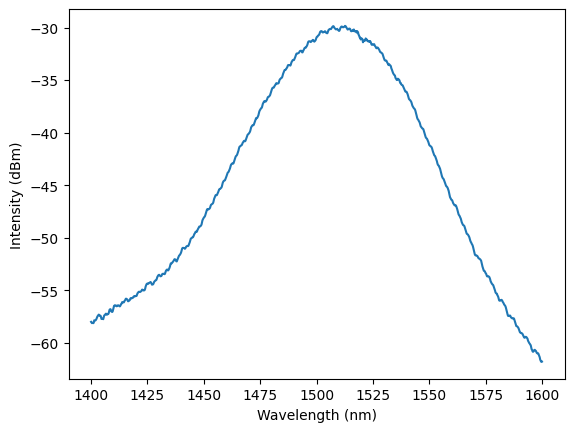

In [5]:
osa.osamain.timeout = 120e3

wavelengths, intensities = osa.get_single_trace(1400, 1600)

plt.plot(wavelengths, intensities)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dBm)')


Preconfig done
SMODE set
CLS command sent
INIT command sent
Query done
-5.80331339E+001,-5.81926068E+001,-5.819


Text(0, 0.5, 'Intensity (dBm)')

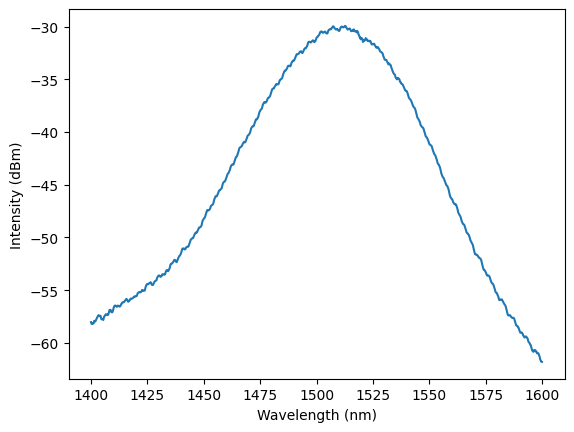

In [13]:
osa.osamain.timeout = 120e3
start_wavelength = 1400
stop_wavelength = 1600
sensitivity= "HIGH2"
sweep_speed = "2x"
sweep_mode = "SINGLE"
wavelengths, intensities = osa.get_single_trace_with_params(start_wavelength, stop_wavelength, sensitivity, sweep_speed, sweep_mode)

plt.plot(wavelengths, intensities)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dBm)')

Preconfig done
SMODE set
CLS command sent
INIT command sent
Query done
-5.83349282E+001,-5.80509329E+001,-5.802
Preconfig done
SMODE set
CLS command sent
INIT command sent
Query done
-5.61577821E+001,-5.60340121E+001,-5.579
Preconfig done
SMODE set
CLS command sent
INIT command sent
Query done
-5.36266541E+001,-5.35261699E+001,-5.346
Preconfig done
SMODE set
CLS command sent
INIT command sent
Query done
-5.00627606E+001,-5.00650867E+001,-4.998
Preconfig done
SMODE set
CLS command sent
INIT command sent
Query done
-4.43551715E+001,-4.42515244E+001,-4.411


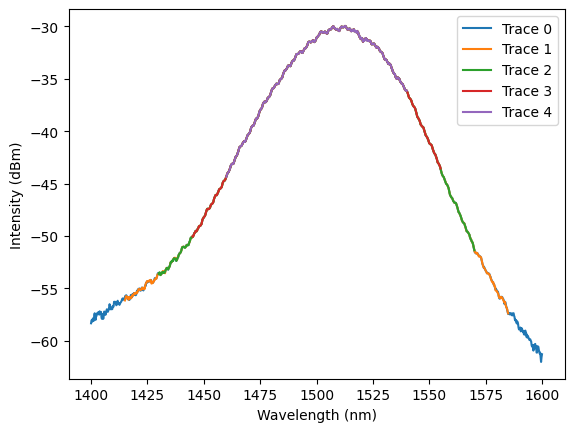

In [16]:
osa.osamain.timeout = 120e3
start_wavelength = 1400
stop_wavelength = 1600
sensitivity= "NORMAL"
sweep_speed = "2x"
sweep_mode = "SINGLE"

for i in range(5):
    wavelengths, intensities = osa.get_single_trace_with_params(start_wavelength, stop_wavelength, sensitivity, sweep_speed, sweep_mode)
    start_wavelength += 15
    stop_wavelength -= 15
    plt.plot(wavelengths, intensities, label=f"Trace {i}")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dBm)')
plt.legend()